In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(iris.data)
print(iris.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


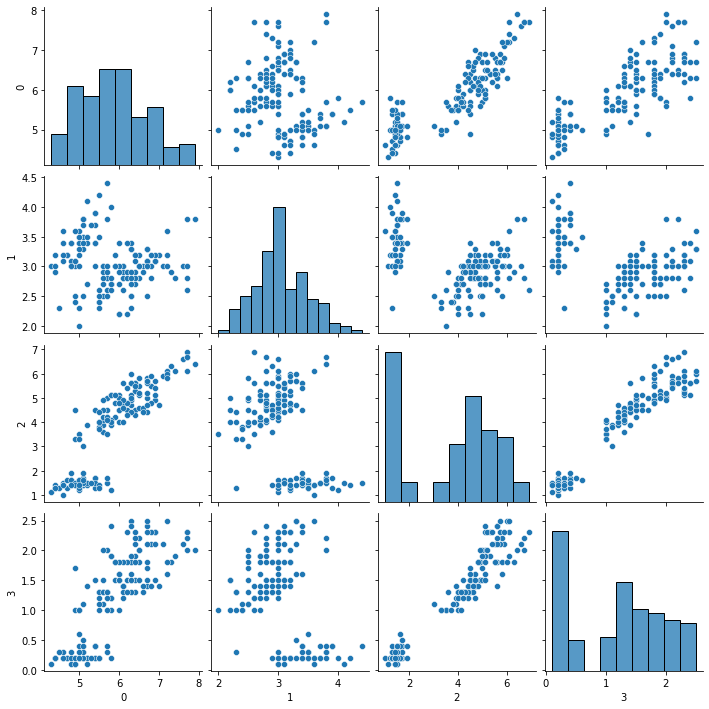

In [10]:
ds=pd.DataFrame(data=iris.data)
print(ds)
sb.pairplot(ds)

In [11]:
x=iris.data
y=iris.target
    

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [16]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.9696969696969697
[[12  0  0]
 [ 0 10  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



In [17]:
svc=SVC(kernel='rbf') #kernel=rbf default
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


1.0
[[12  0  0]
 [ 0 10  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [19]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[1.         0.96666667 0.9        0.9        1.        ]
0.9533333333333334
0.04521553322083511


In [20]:
from sklearn.model_selection import KFold
kfold=KFold(5)
score=cross_val_score(svc,x,y,cv=kfold)
print(score)
print(score.mean())
print(score.std())

[1.         1.         0.83333333 0.93333333 0.7       ]
0.8933333333333333
0.11430952132988166


In [ ]:
#from sklearn.model_selection import LeaveOneOut #one row ll go for testing remaining for training
#loocv=LeaveOneOut()

#score=cross_val_score(dtc,x,y,cv=loocv)
#print(score)
#print(score.mean())
#print(score.std())



# IMBALANCED DATASET

# SMOTE (Synthetic Minority Over-samplig Technique)

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [23]:
ds=pd.read_csv("pima_indian_diabetes.csv",header=0,names=range(0,8)) #if header is not provided in csv
ds

,0,1,2,3,4,5,6,7
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


In [24]:
df=pd.DataFrame(data=ds)
df

,0,1,2,3,4,5,6,7
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


In [26]:
dfx=df.iloc[:,0:7]
dfx

,0,1,2,3,4,5,6
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30
1,126,60,0,0,30.1,0.349,47


In [27]:
dfy=df.iloc[:,-1]
dfy

6     1
1     0
8     1
1     0
0     1
     ..
10    0
2     0
5     0
1     1
1     0
Name: 7, Length: 768, dtype: int64

In [29]:
dfy.value_counts()

0    500
1    268
Name: 7, dtype: int64

<AxesSubplot:xlabel='7', ylabel='count'>

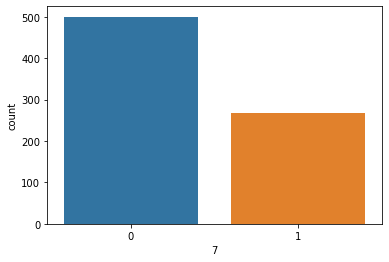

In [30]:
sns.countplot(dfy)

# Apply SMOTE

In [33]:
import sklearn
sklearn.__version__

'0.24.2'

In [34]:
!pip install scikit.learn
import numpy
numpy.__version__

'1.20.3'

In [38]:
#!pip install -U imbalanced-learn
!pip install --user imblearn
#pip install imblearn

In [42]:
from imblearn.over_sampling import SMOTE


ImportError: cannot import name '_euclidean_distances' from 'sklearn.metrics.pairwise' (C:\Users\mayuk\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py)

In [ ]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)


In [ ]:
trainx.value_counts()

In [ ]:
trainy.value_counts()

In [ ]:
trainy

In [ ]:
sns.countplot(trainy)

In [ ]:
from sklearn.model_selection import train_test_split


In [43]:
trainx,testx,trainy,testy=train_test_split(trainx,trainy,test_size=.30,random_state=45)

NameError: name 'trainx' is not defined

In [ ]:
trainx.shape

In [ ]:
trainy.shape

In [ ]:
lg=LogisticRegression()
lg.fit(trainx,trainy)
lg.score(trainx,trainy)

pred=lg.predict(test_x)

from sklearn.metrics import accuracy_score
print(round(accuracy_score(test_y,pred),2))

In [45]:
dfiris=pd.read_csv('iris.csv')
dfiris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
dfiris.sample(3)

,sepal length,sepal width,petal length,petal width,class
17,5.1,3.5,1.4,0.3,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa


In [48]:
dfiris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

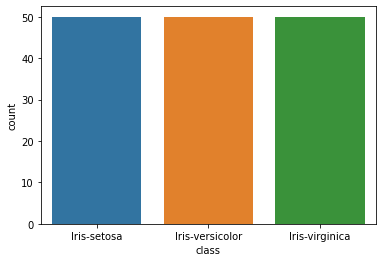

In [49]:
sns.countplot(dfiris['class'])

# IMBALANCED WINE QUALITY DATASET

In [51]:
winedf=pd.read_csv('winequality.csv')
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,5.4,0.31,0.47,3.0,0.053,46,144,0.9931,3.29,0.76,10.0,white
1,6.9,0.41,0.33,10.1,0.043,28,152,0.9968,3.20,0.52,9.4,white
2,6.5,0.21,0.37,2.5,0.048,70,138,0.9917,3.33,0.75,11.4,white
3,7.7,0.27,0.35,5.3,0.030,30,117,0.9920,3.11,0.42,12.2,white
4,6.2,0.16,0.54,1.4,0.126,37,110,0.9932,3.23,0.37,8.9,white


In [53]:
winedf.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
8,6.4,0.29,0.28,11.1,0.063,66,169,0.9973,2.89,0.57,9.0,white
24,7.1,0.43,0.42,5.5,0.071,28,128,0.9973,3.42,0.71,10.5,red
27,9.9,0.50,0.24,2.3,0.103,6,14,0.9978,3.34,0.52,10.0,red


In [54]:
winedf['alcohol'].value_counts()

10.0    3
11.1    2
9.8     2
9.5     2
10.4    2
12.2    2
10.5    2
11.5    1
8.9     1
9.0     1
8.8     1
9.7     1
9.4     1
9.2     1
12.0    1
11.0    1
13.0    1
12.6    1
11.3    1
12.1    1
11.4    1
Name: alcohol, dtype: int64

<AxesSubplot:xlabel='alcohol', ylabel='count'>

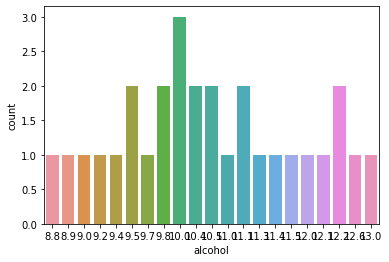

In [55]:
sns.countplot(winedf['alcohol'])

In [57]:
x=winedf.iloc[:,0:-1]
y=winedf.iloc[:,-1]
y

0     white
1     white
2     white
3     white
4     white
5     white
6     white
7     white
8     white
9     white
10    white
11    white
12    white
13    white
14    white
15    white
16    white
17    white
18    white
19    white
20    white
21    white
22    white
23    white
24      red
25      red
26      red
27      red
28      red
Name: color, dtype: object

In [58]:
y.shape

(29,)

In [60]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
xtrainw,ytrainw=sm.fit_resample(x,y)
ytrainw

ImportError: cannot import name '_euclidean_distances' from 'sklearn.metrics.pairwise' (C:\Users\mayuk\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py)

In [ ]:
ytrainw.value_counts()

In [61]:
sns.countplot(ytrainw)

NameError: name 'ytrainw' is not defined

In [ ]:
Curse of dimentionality reduction
PCA - Principal component analysis

pca=PCA(12) #12 components
x=df.iloc[:,0:-1]
X=pca.fit_transform(x)

